In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
train_df = pd.read_csv('D:\Covid\covid19-global-forecasting-week-1/train.csv')
test_df = pd.read_csv('D:\Covid\covid19-global-forecasting-week-1/test.csv')
sub_df = pd.read_csv('D:\Covid\covid19-global-forecasting-week-1/submission.csv')

In [51]:
train_df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,1/22/2020,0,0
1,2,NaN,Afghanistan,33.0,65.0,1/23/2020,0,0
2,3,NaN,Afghanistan,33.0,65.0,1/24/2020,0,0
3,4,NaN,Afghanistan,33.0,65.0,1/25/2020,0,0
4,5,NaN,Afghanistan,33.0,65.0,1/26/2020,0,0


In [52]:
train_df['Date'].min(), train_df['Date'].max()

('1/22/2020', '3/9/2020')

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



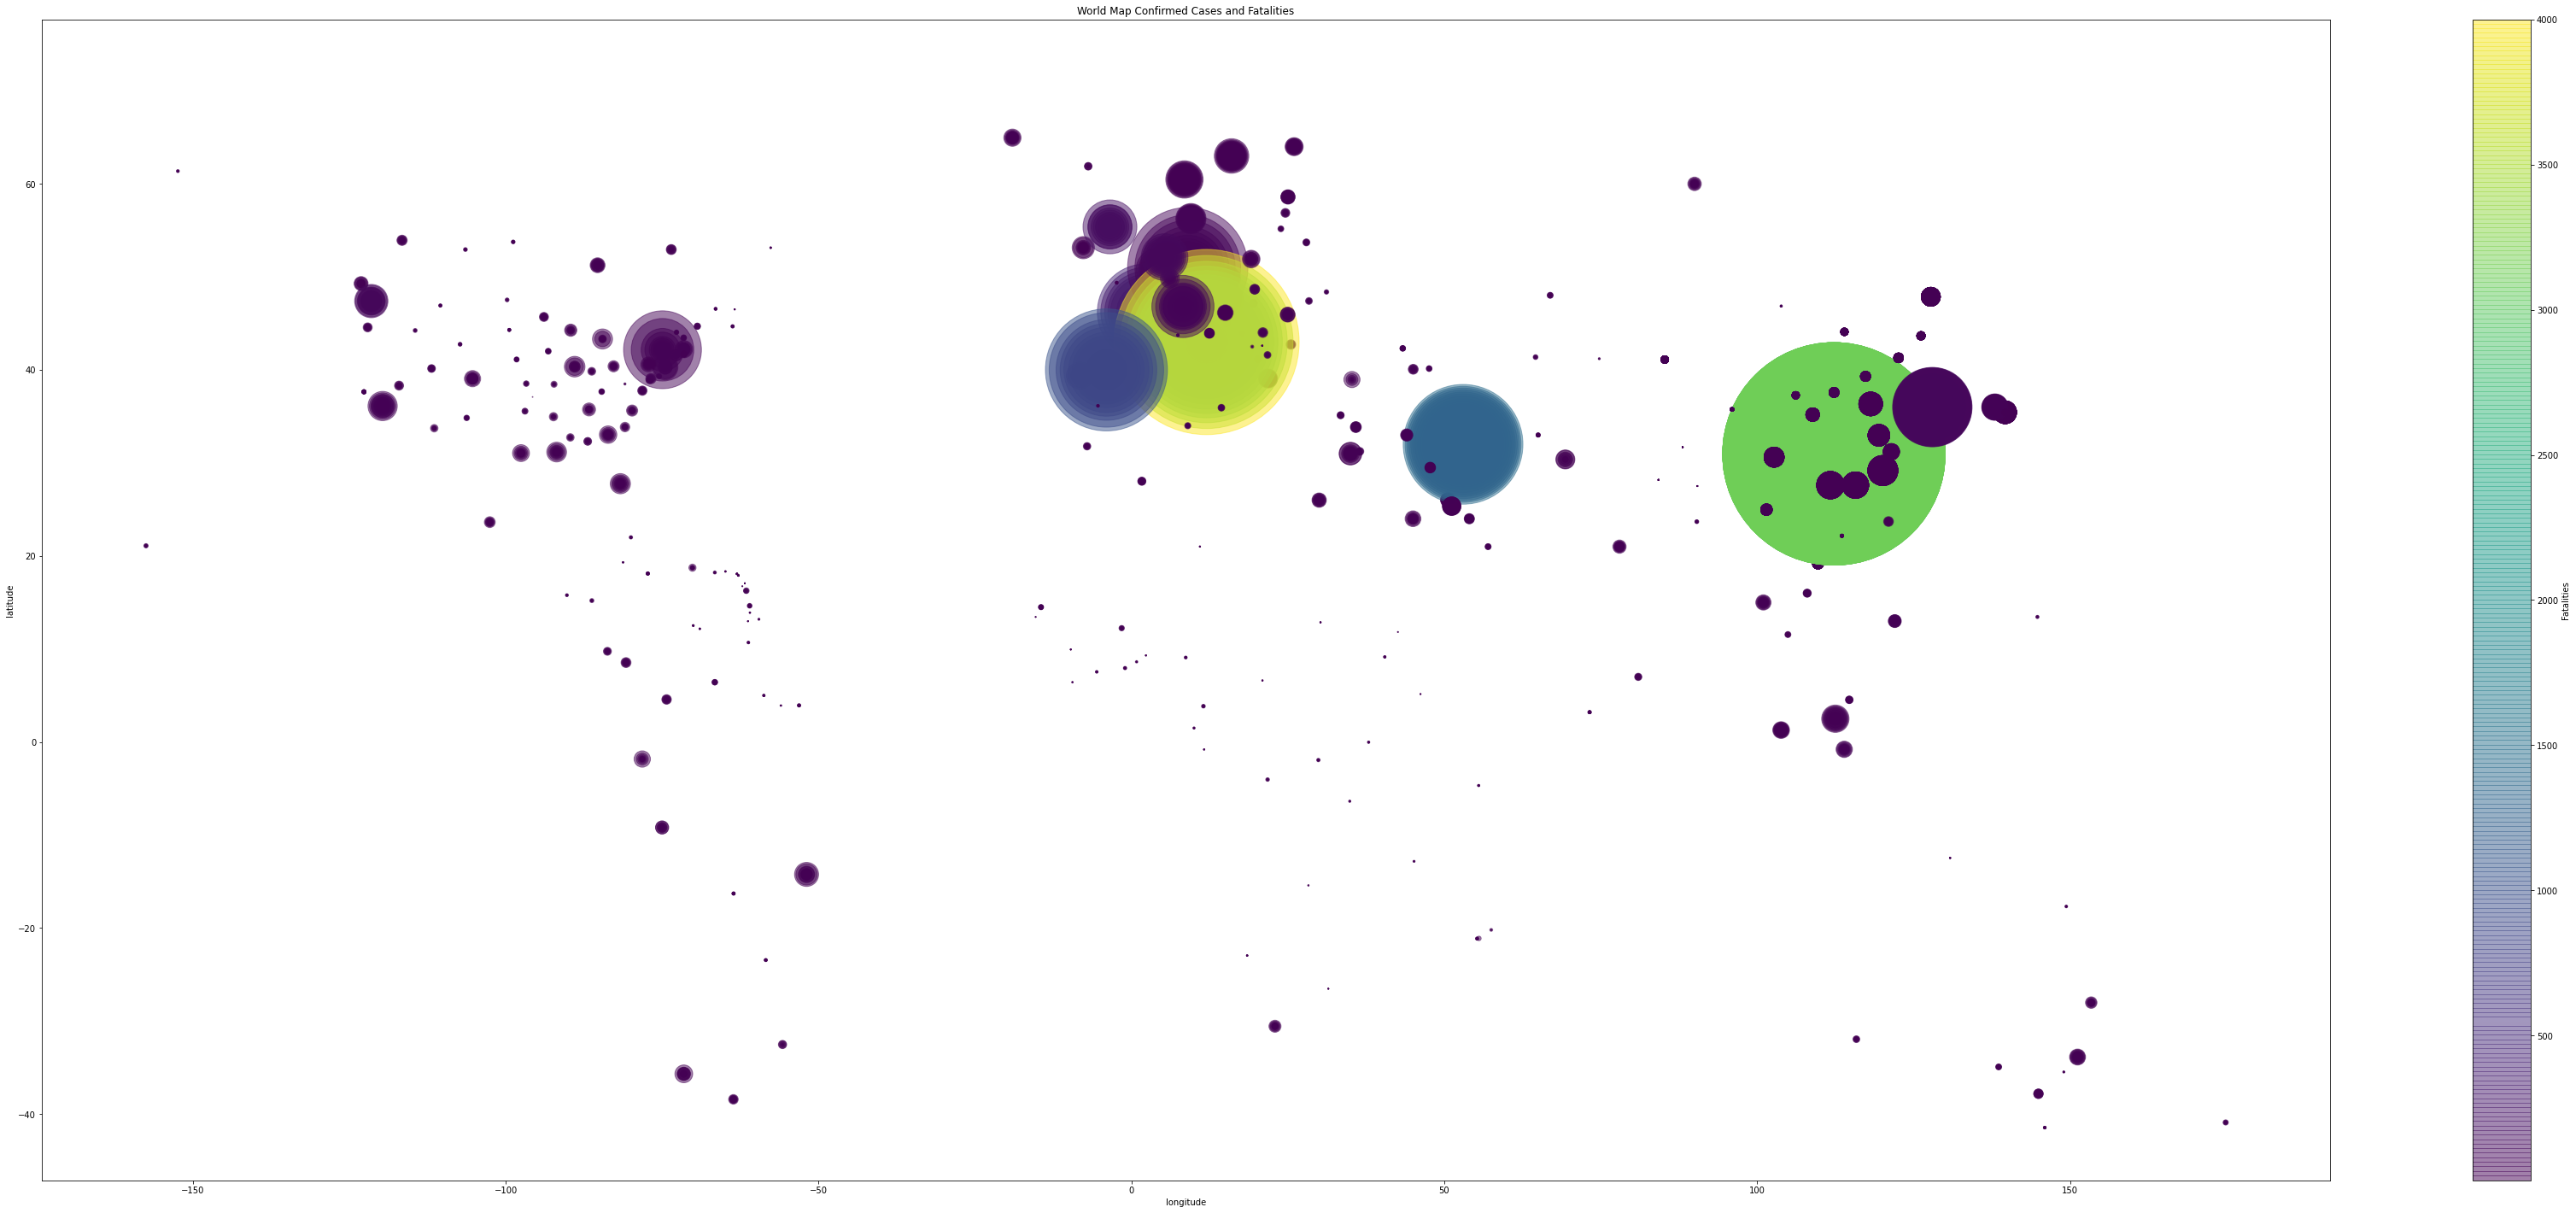

In [53]:

lat, lon = train_df['Lat'], train_df['Long']
conf_cases, fate = train_df['ConfirmedCases'], train_df['Fatalities']
       # Scatter the points, using size and color but no label
plt.figure(figsize=(60,25))
plt.scatter(lon, lat, label=None,
                    c=fate, cmap='viridis',
                    s=conf_cases, linewidth=1, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='Fatalities')
plt.clim(1, 4000)

       # Here we create a legend:
       # we'll plot empty lists with the desired size and label
#for conf_cases in [100,1000,2000]:
 #   plt.scatter([], [], c='k', alpha=0.3, s=fate,
  #                     label=str(conf_cases))
#plt.legend(scatterpoints=1, frameon=False,
                 # labelspacing=1, title='conf_cases')

plt.title('World Map Confirmed Cases and Fatalities');

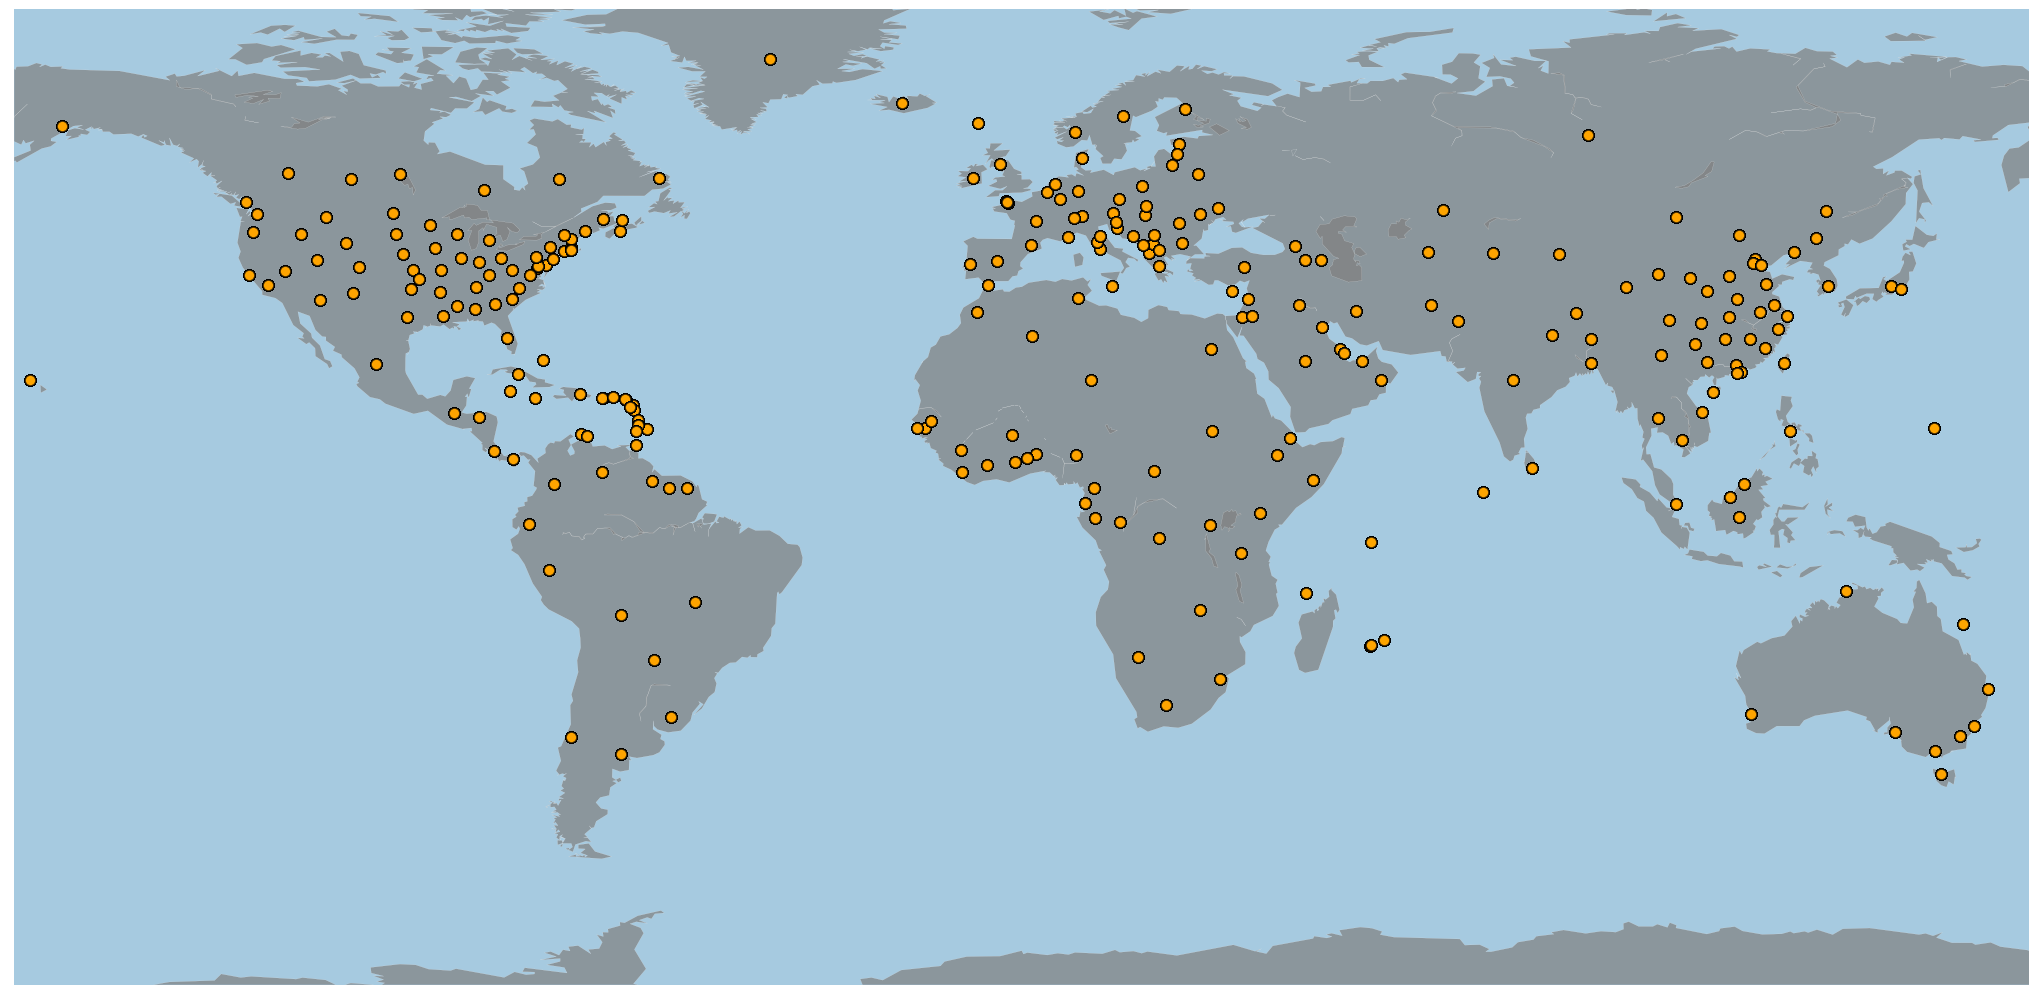

In [54]:
import os
os.environ['PROJ_LIB'] = 'C:\Anaconda\Library\share\proj'
from mpl_toolkits.basemap import Basemap

my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)

# A basic map
m=Basemap(llcrnrlon=-160, llcrnrlat=-75,urcrnrlon=160,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")


lat, lon = train_df['Lat'], train_df['Long']
conf_cases, fate = train_df['ConfirmedCases'], train_df['Fatalities']
m.plot(lon, lat, linestyle='none', marker="o", markersize=8, alpha=0.5, c="orange", markeredgecolor="black", markeredgewidth=1)


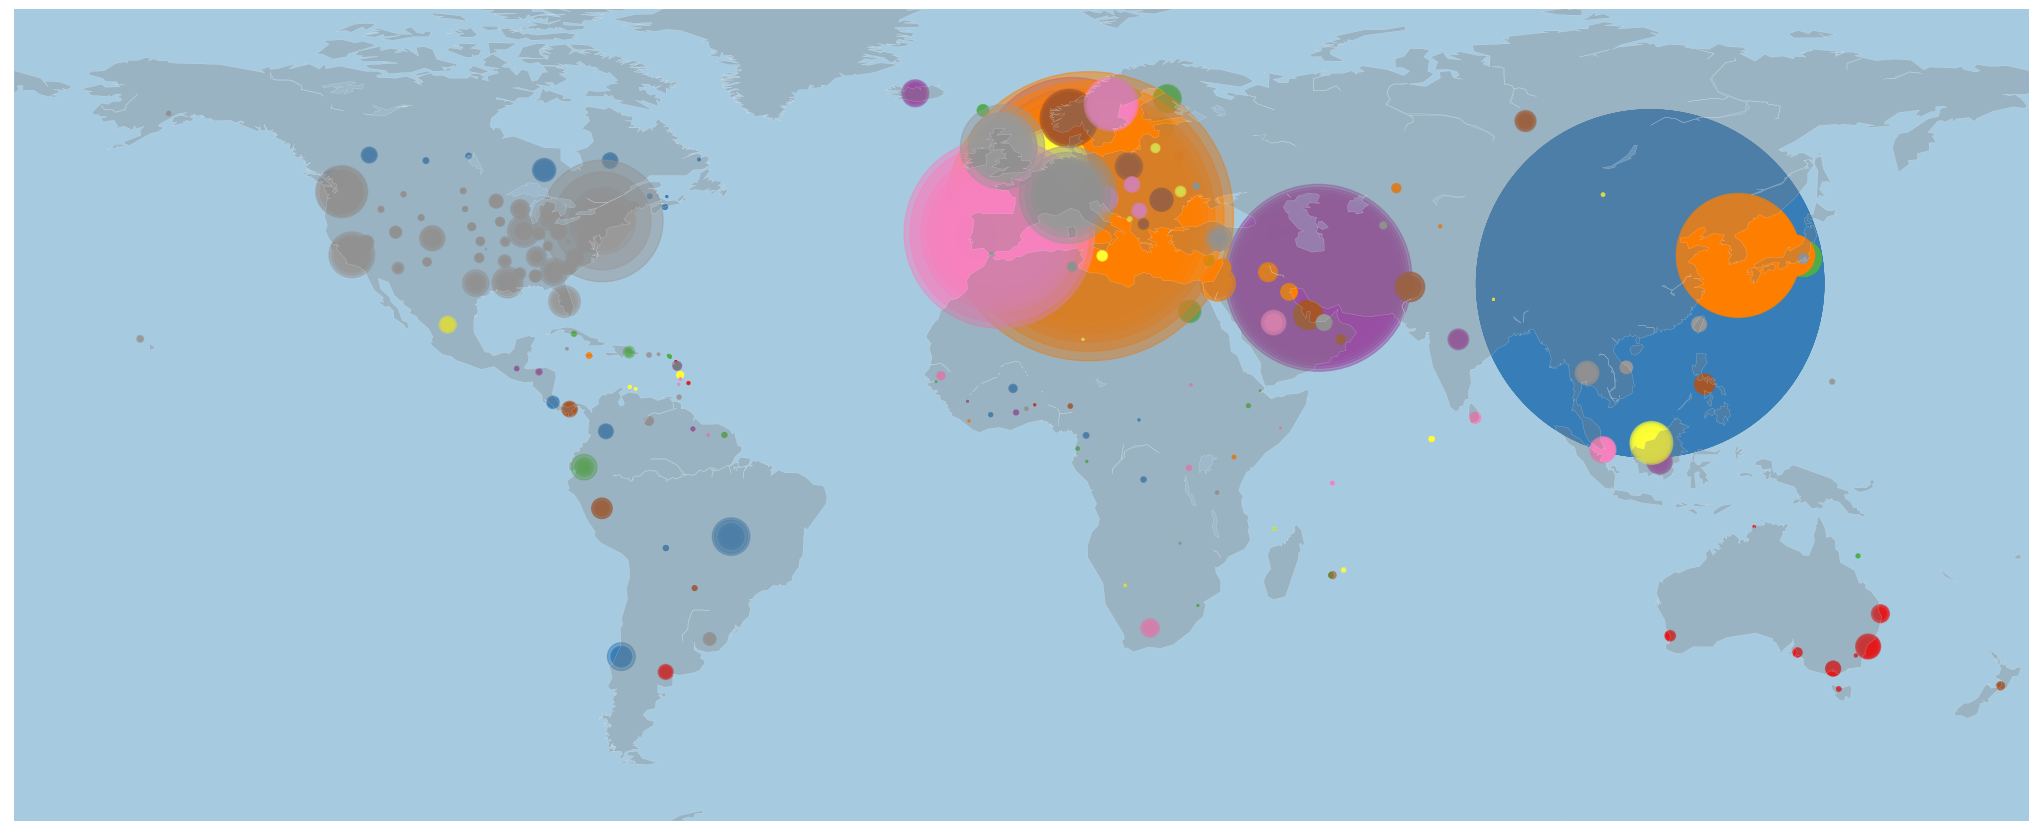

In [55]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
 
# Set the dimension of the figure
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
labels_enc =  pd.factorize(train_df['Country/Region'])[0]
lat, lon = train_df['Lat'], train_df['Long']
conf_cases, fate = train_df['ConfirmedCases'], train_df['Fatalities']
m.scatter(lon, lat, s=conf_cases, alpha=0.5, c=labels_enc, cmap="Set1")



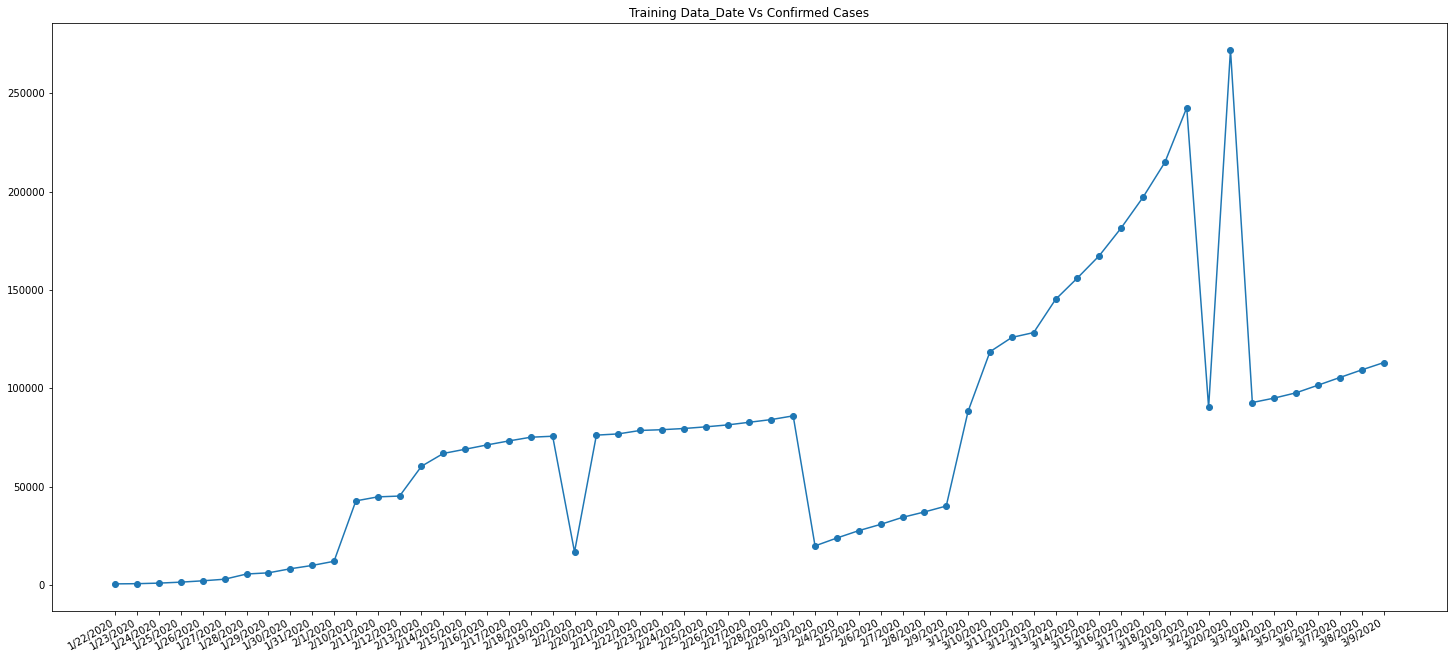

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.ticker as ticker

confirmed_cases = train_df.groupby('Date')['Date', 'ConfirmedCases'].sum().reset_index()
confirmed_cases.head()
fig, (ax1) = plt.subplots(ncols=1, figsize=(25, 12))
ax1.plot(confirmed_cases['Date'], confirmed_cases['ConfirmedCases'], 'o-')
ax1.set_title("Training Data_Date Vs Confirmed Cases")
fig.autofmt_xdate()
plt.show()

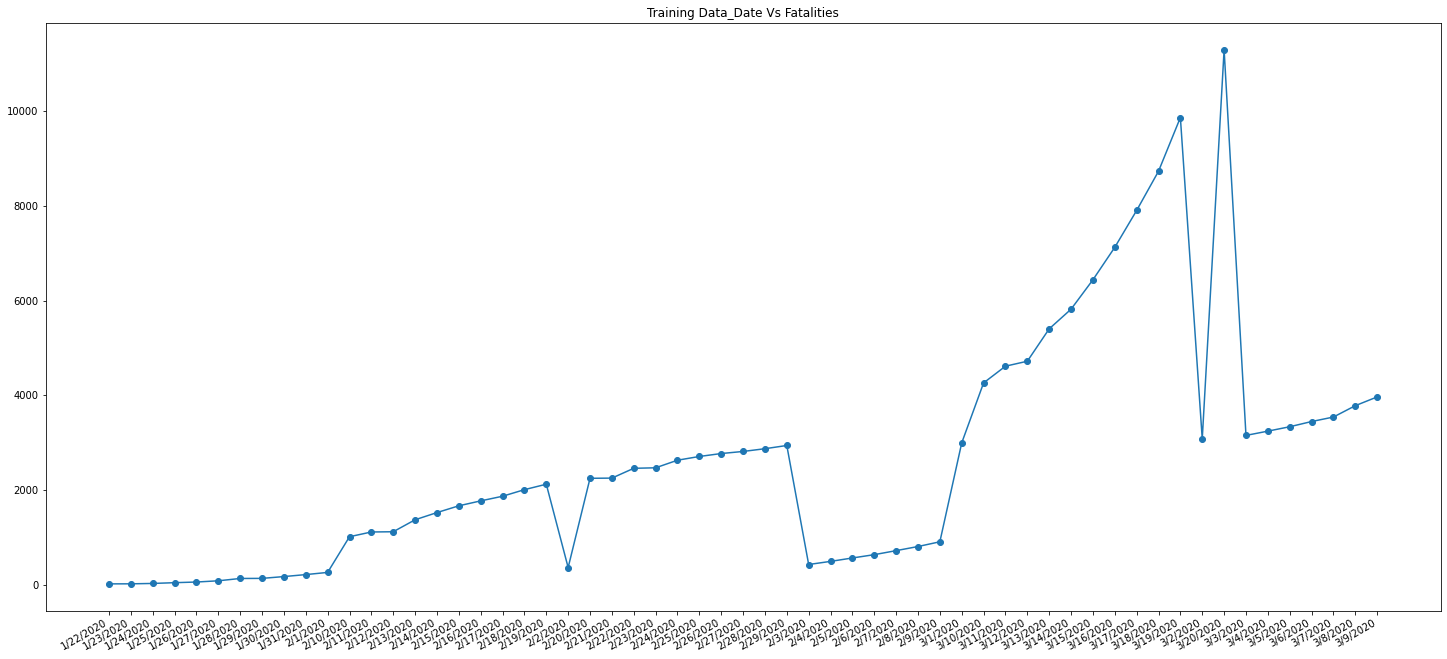

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.ticker as ticker

confirmed_cases = train_df.groupby('Date')['Date', 'Fatalities'].sum().reset_index()
confirmed_cases.head()
fig, (ax1) = plt.subplots(ncols=1, figsize=(25, 12))
ax1.plot(confirmed_cases['Date'], confirmed_cases['Fatalities'], 'o-')
ax1.set_title("Training Data_Date Vs Fatalities")
fig.autofmt_xdate()
plt.show()

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.0005, loss='quantile', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MSE: 6236009.8129
4.028616470669629


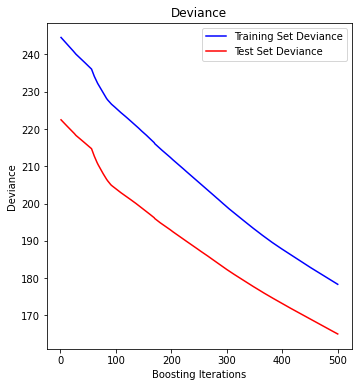

In [58]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix


#df_train_country = train_df[train_df['Country/Region'] == country]
#df_test_country = test_df[test_df['Country/Region'] == country]
    
X = np.array(range(len(train_df))).reshape((-1, 1))

y = train_df['ConfirmedCases']
#print(X,y)
#X,y = shuffle(X,y)
#y = y.sample(frac = 1)
X_train, X_test, y_train, y_test = train_test_split(
                               X, y, test_size=0.33, random_state=42)
params = {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 2,
          'learning_rate': 0.0005, 'loss': 'quantile'}
clf = ensemble.GradientBoostingRegressor(**params)

clm = clf.fit(X_train, y_train)
print(clm)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print (rmsle)

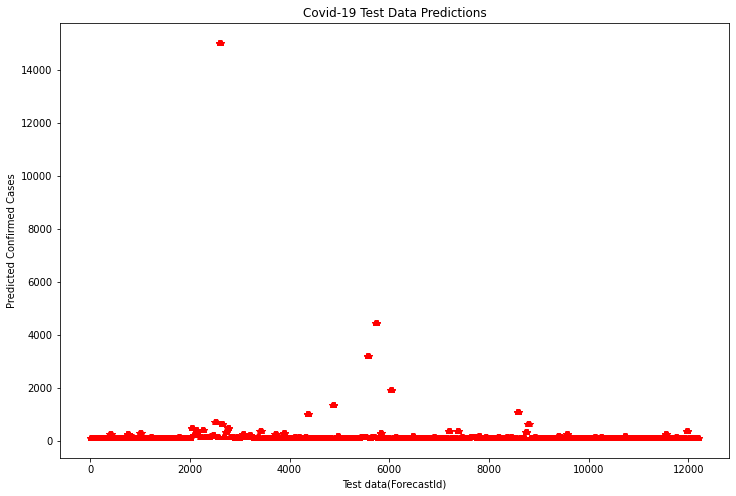

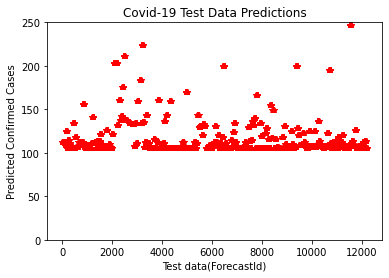

In [59]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

from plotly.offline import iplot
from plotly import tools
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import plotly.figure_factory as ff
#df_train_country = train_df[train_df['Country/Region'] == country]
#df_test_country = test_df[test_df['Country/Region'] == country]
    
#X_train = np.array(range(len(train_df))).reshape((-1, 1))
train_df['Lat'] = train_df['Lat'].fillna(0)
train_df['Long'] = train_df['Long'].fillna(0)

test_df['Lat'] = test_df['Lat'].fillna(0)
test_df['Long'] = test_df['Long'].fillna(0)
X_train = train_df[['Lat','Long']]
y_train = train_df['ConfirmedCases']
#print(X,y)
#X,y = shuffle(X,y)
#y = y.sample(frac = 1)
#X_train, X_test, y_train, y_test = train_test_split(
                               #X, y, test_size=0.33, random_state=42)
params = {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 2,
          'learning_rate': 0.0005, 'loss': 'quantile'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
#print(clm)
x_test = test_df[['Lat','Long']]
#x_test = np.array(range(len(test_df))).reshape((-1, 1))
prediction = clf.predict(x_test)
sub_df['Confirmed Cases_GBR'] = prediction.astype(int)
sub_df.loc[50:100]

plt.figure(figsize = (12,8))
plt.plot(clf.predict(x_test), 'r*', label='GradientBoostingRegressor')
plt.ylabel('Predicted Confirmed Cases')
plt.xlabel('Test data(ForecastId)')
plt.title('Covid-19 Test Data Predictions')
plt.show()
plt.plot(clf.predict(x_test), 'r*', label='GradientBoostingRegressor')
plt.ylabel('Predicted Confirmed Cases')
plt.xlabel('Test data(ForecastId)')
plt.title('Covid-19 Test Data Predictions')
plt.ylim(0,250)
plt.show()


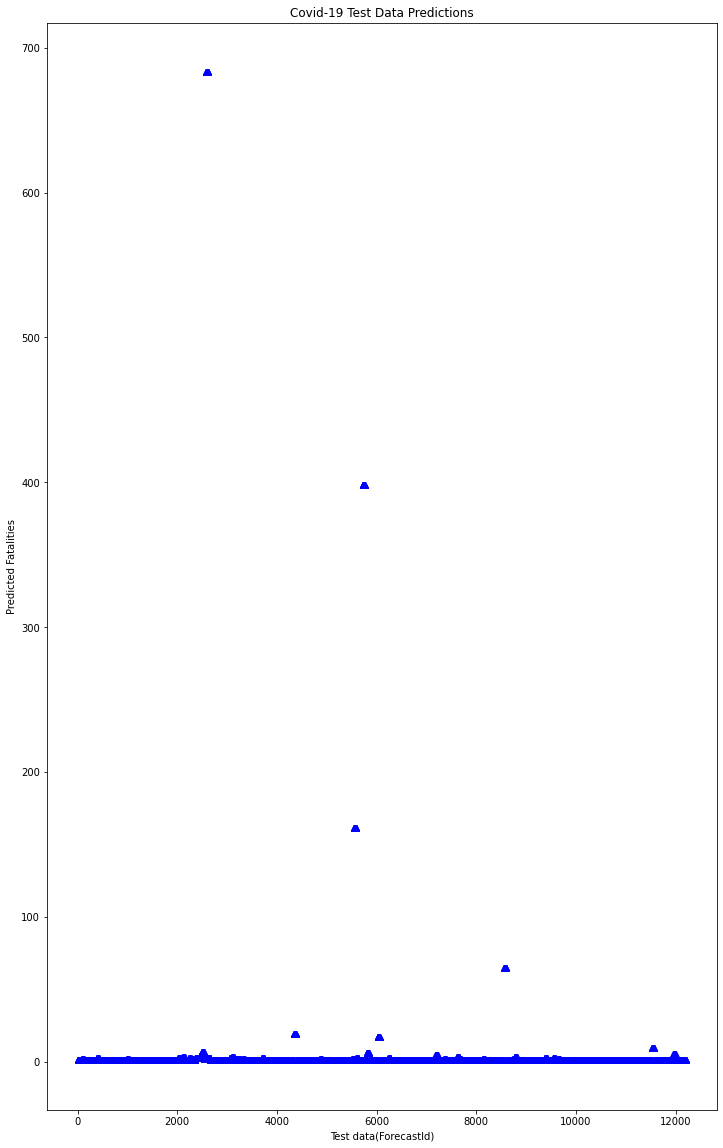

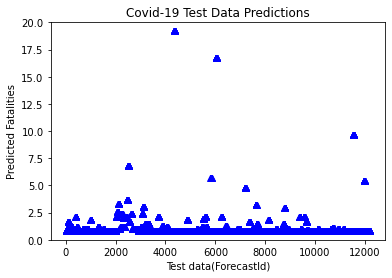

In [60]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
import mpld3

#df_train_country = train_df[train_df['Country/Region'] == country]
#df_test_country = test_df[test_df['Country/Region'] == country]
    
#X_train = np.array(range(len(train_df))).reshape((-1, 1))
train_df['Lat'] = train_df['Lat'].fillna(0)
train_df['Long'] = train_df['Long'].fillna(0)

test_df['Lat'] = test_df['Lat'].fillna(0)
test_df['Long'] = test_df['Long'].fillna(0)
X_train = train_df[['Lat','Long']]
y_train = train_df['Fatalities']
#print(X,y)
#X,y = shuffle(X,y)
#y = y.sample(frac = 1)
#X_train, X_test, y_train, y_test = train_test_split(
                               #X, y, test_size=0.33, random_state=42)
params = {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 2,
          'learning_rate': 0.0005, 'loss': 'quantile'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
#print(clm)
x_test = test_df[['Lat','Long']]
#x_test = np.array(range(len(test_df))).reshape((-1, 1))
prediction = clf.predict(x_test)
sub_df['Fatalities_GBR'] = prediction.astype(int)
sub_df.loc[50:100]
plt.figure(figsize = (12,20))
plt.plot(clf.predict(x_test), 'b^', label='GradientBoostingRegressor')
plt.ylabel('Predicted Fatalities')
plt.xlabel('Test data(ForecastId)')
plt.title('Covid-19 Test Data Predictions')
plt.show()

plt.plot(clf.predict(x_test), 'b^', label='GradientBoostingRegressor')
plt.ylabel('Predicted Fatalities')
plt.xlabel('Test data(ForecastId)')
plt.title('Covid-19 Test Data Predictions')
plt.ylim(0,20)
plt.show()

#labels = ['Countries {0}']
#tooltip = mpld3.plugins.PointLabelTooltip(plot, labels=labels)
#mpld3.plugins.connect(fig, tooltip)

#mpld3.show()

In [61]:
from sklearn import linear_model
#df_train_country = train_df[train_df['Country/Region'] == country]
#df_test_country = test_df[test_df['Country/Region'] == country]
    
X = np.array(range(len(train_df))).reshape((-1, 1))

y = train_df['ConfirmedCases']

#X_train, X_test, y_train, y_test = train_test_split(
                              # X, y, test_size=0.33, random_state=42)
#print(np.unique(y))
clf = linear_model.SGDClassifier(loss="hinge", alpha=0.01,max_iter=1000, tol=1e-3)
clf.fit(X, y)
#x_test = test_df[['Lat','Long']]
x_test = np.array(range(len(test_df))).reshape((-1, 1))
prediction = clf.predict(x_test)
sub_df['Confirmed Cases_SGD'] = prediction.astype(int)
sub_df.loc[50:100]


,ForecastId,ConfirmedCases,Fatalities,Confirmed Cases_GBR,Fatalities_GBR,Confirmed Cases_SGD
50,51,1,1,112,1,154
51,52,1,1,112,1,154
52,53,1,1,112,1,154
53,54,1,1,112,1,154
54,55,1,1,112,1,154
55,56,1,1,112,1,154
56,57,1,1,112,1,154
57,58,1,1,112,1,154
58,59,1,1,112,1,154
59,60,1,1,112,1,154


In [62]:
from sklearn import linear_model
#df_train_country = train_df[train_df['Country/Region'] == country]
#df_test_country = test_df[test_df['Country/Region'] == country]
    
X = np.array(range(len(train_df))).reshape((-1, 1))

y = train_df['Fatalities']

#X_train, X_test, y_train, y_test = train_test_split(
                              # X, y, test_size=0.33, random_state=42)
#print(np.unique(y))
clf = linear_model.SGDClassifier(loss="hinge", alpha=0.01,max_iter=1000, tol=1e-3)
clf.fit(X, y)
#x_test = test_df[['Lat','Long']]
x_test = np.array(range(len(test_df))).reshape((-1, 1))
prediction = clf.predict(x_test)
sub_df['Fatalities_SGD'] = prediction.astype(int)
sub_df.loc[50:100]


,ForecastId,ConfirmedCases,Fatalities,Confirmed Cases_GBR,Fatalities_GBR,Confirmed Cases_SGD,Fatalities_SGD
50,51,1,1,112,1,154,1
51,52,1,1,112,1,154,1
52,53,1,1,112,1,154,1
53,54,1,1,112,1,154,1
54,55,1,1,112,1,154,1
55,56,1,1,112,1,154,1
56,57,1,1,112,1,154,1
57,58,1,1,112,1,154,1
58,59,1,1,112,1,154,1
59,60,1,1,112,1,154,1


In [63]:
sub_df.drop("Fatalities", axis=1, inplace=True)
sub_df.drop("ConfirmedCases", axis=1, inplace=True)
sub_df.to_csv('submission.csv',index=False)